## Importing our libraries

In [4]:
import os
import panel as pn
pn.extension('plotly')
import plotly.express as px
import requests
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas_datareader import data as wb
import seaborn as sns
import datetime as dt
import numpy as np
from matplotlib import style
from scipy.stats import norm
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

%matplotlib inline

## TICKERS BY PRICE

In [2]:
#Calling specific data from panda-datareader for price
tickers = ["BTC-USD", "ETH-USD", "SOL-USD", "LTC-USD", "ATOM-USD"]
coins_data = pd.DataFrame()
coins_data[tickers] = web.DataReader(tickers, data_source='yahoo', start='2018-1-1')['Adj Close'].pct_change().dropna()
coins_data

,BTC-USD,ETH-USD,SOL-USD,LTC-USD,ATOM-USD
Date,,,,,
2020-04-11,-0.000934,-0.001240,-0.183202,0.001166,-0.001487
2020-04-12,0.016330,0.018496,0.136052,0.003100,0.012017
2020-04-13,-0.018082,-0.030177,-0.118611,-0.029351,-0.030470
2020-04-14,-0.000381,0.008426,-0.149013,-0.003653,0.037750
2020-04-15,-0.029276,-0.027345,-0.023075,-0.035679,-0.030297
...,...,...,...,...,...
2022-01-25,0.008176,0.006385,0.033499,-0.013917,-0.002964
2022-01-26,-0.002757,0.004925,-0.026207,-0.007257,-0.096513
2022-01-27,0.007764,-0.018245,-0.028248,-0.003064,-0.069652


## TICKERS BY VOLUME

In [3]:
#Calling specific data from panda-datareader for volume
tickers = ["BTC-USD", "ETH-USD", "SOL-USD", "LTC-USD", "ATOM-USD"]
coins_data_volume = pd.DataFrame()
coins_data_volume[tickers] = wb.DataReader(tickers, data_source='yahoo', start='2018-1-1')['Volume'].pct_change().dropna()
coins_data_volume

,BTC-USD,ETH-USD,SOL-USD,LTC-USD,ATOM-USD
Date,,,,,
2020-04-11,-0.284272,-0.246141,-0.497936,-0.158160,-0.332518
2020-04-12,0.145329,0.115723,-0.116855,0.078441,-0.034145
2020-04-13,0.079971,0.088706,-0.529872,0.098540,0.026039
2020-04-14,-0.116752,-0.105806,-0.080372,-0.071267,0.028916
2020-04-15,-0.053418,-0.037451,-0.219275,-0.004413,0.038594
...,...,...,...,...,...
2022-01-25,-0.368603,-0.426672,-0.390582,-0.447670,-0.358718
2022-01-26,0.185272,0.312126,0.117684,0.170497,-0.044868
2022-01-27,-0.200583,-0.240387,-0.208751,-0.224080,-0.394881


## Showing RAW Data - Bitcoin, Ethereum, Solana, Litecoin, Cosmos

In [5]:
#Importing CSV file for S&P500 and changing dtype to datetime to work with other datasets
sp500_csv = Path("S&P500.csv")
sp500_df = pd.read_csv(sp500_csv)
sp500_df = sp500_df.rename(columns={"Close":"S&P500"})
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.set_index(["Date"], inplace=True)
sp500_df

,S&P500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03
...,...
2022-01-18,4577.11
2022-01-19,4532.76
2022-01-20,4482.73


In [6]:
#Setting variables for datareader so we can get data from specific date ranges
start = dt.datetime(2018,1,1)
end =dt.datetime.now()

In [7]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Bitcoin
bitcoin = web.DataReader('BTC-USD', 'yahoo', start, end)

bitcoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,10291200000,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,16846600192,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,16871900160,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,21783199744,15599.200195
2018-01-05,17705.199219,15202.799805,15477.200195,17429.500000,23840899072,17429.500000
...,...,...,...,...,...,...
2022-01-25,37444.570312,35779.429688,36654.804688,36954.003906,26428189594,36954.003906
2022-01-26,38825.410156,36374.906250,36950.515625,36852.121094,31324598034,36852.121094
2022-01-27,37148.324219,35629.281250,36841.878906,37138.234375,25041426629,37138.234375


In [8]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Ethereum
ethereum = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,782.530029,742.004028,755.757019,772.640991,2595760128,772.640991
2018-01-02,914.830017,772.346008,772.346008,884.443970,5783349760,884.443970
2018-01-03,974.471008,868.450989,886.000000,962.719971,5093159936,962.719971
2018-01-04,1045.079956,946.085999,961.713013,980.921997,6502859776,980.921997
2018-01-05,1075.390015,956.325012,975.750000,997.719971,6683149824,997.719971
...,...,...,...,...,...,...
2022-01-25,2498.507080,2359.384766,2440.393555,2455.935059,16179776932,2455.935059
2022-01-26,2705.784180,2417.683105,2455.579102,2468.030273,21229909340,2468.030273
2022-01-27,2510.451660,2328.452148,2467.188477,2423.001221,16126522783,2423.001221


In [9]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Solana
solana = web.DataReader('SOL-USD', 'yahoo', start, end)
solana

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-10,1.313487,0.694187,0.832005,0.951054,87364276,0.951054
2020-04-11,1.049073,0.765020,0.951054,0.776819,43862444,0.776819
2020-04-12,0.956670,0.762426,0.785448,0.882507,38736897,0.882507
2020-04-13,0.891603,0.773976,0.890760,0.777832,18211285,0.777832
2020-04-14,0.796472,0.628169,0.777832,0.661925,16747614,0.661925
...,...,...,...,...,...,...
2022-01-25,99.701233,87.757126,91.660156,94.720352,2842652332,94.720352
2022-01-26,103.721558,89.807556,94.718834,92.238045,3177186515,92.238045
2022-01-27,94.059998,86.186035,92.218056,89.632492,2513945822,89.632492


In [10]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Litecoin
litecoin = web.DataReader('LTC-USD', 'yahoo', start, end)
litecoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,236.634003,222.203003,231.666000,229.033005,633142016,229.033005
2018-01-02,263.625000,228.990005,228.990005,255.684006,1237949952,255.684006
2018-01-03,260.742004,243.134995,255.695007,245.367996,3215280128,245.367996
2018-01-04,245.475006,227.013000,245.475006,241.369995,3481550080,241.369995
2018-01-05,256.148010,237.880005,241.033997,249.270996,1710599936,249.270996
...,...,...,...,...,...,...
2022-01-25,109.682343,106.339424,109.592476,108.066376,909091096,108.066376
2022-01-26,115.783005,105.849983,108.062302,107.282181,1064088735,107.282181
2022-01-27,109.468987,103.784393,107.261360,106.953514,825647673,106.953514


In [11]:
#Using our data source, DataReader, to obtain historical daily output for Cosmos
cosmos = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-14,6.639943,6.353963,6.439715,6.526642,7318172,6.526642
2019-03-15,7.715249,6.432468,6.633174,7.504351,6057301,7.504351
2019-03-16,8.305615,6.694531,7.507990,7.383882,3477393,7.383882
2019-03-17,7.357443,4.727895,7.357443,4.776164,2653565,4.776164
2019-03-18,5.229982,4.828242,4.828242,5.110341,2567201,5.110341
...,...,...,...,...,...,...
2022-01-25,37.085804,35.057510,35.895691,35.800282,2514518995,35.800282
2022-01-26,35.863892,31.507872,35.791805,32.345074,2401696392,32.345074
2022-01-27,32.835590,28.738247,32.340385,30.092173,1453312448,30.092173


### Data Cleanup - Obtaining what we need, deleting what we do not. Volume and Closing Price are needed.

In [12]:
#Drop unnecessary columns
bitcoin.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
#Rename columns 
bitcoin = bitcoin.rename(columns={"Adj Close":"Bitcoin"})
bitcoin

,Bitcoin
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000
...,...
2022-01-25,36954.003906
2022-01-26,36852.121094
2022-01-27,37138.234375


In [13]:
#Drop unnecessary columns
bitcoin1 = web.DataReader('BTC-USD', 'yahoo', start, end)
bitcoin1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
#Rename columns 
bitcoin1 = bitcoin1.rename(columns={"Volume":" BTC Volume"})
bitcoin1

,BTC Volume
Date,
2018-01-01,10291200000
2018-01-02,16846600192
2018-01-03,16871900160
2018-01-04,21783199744
2018-01-05,23840899072
...,...
2022-01-25,26428189594
2022-01-26,31324598034
2022-01-27,25041426629


In [14]:
#Drop unnecessary columns
ethereum = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
#Rename columns 
ethereum = ethereum.rename(columns={"Adj Close":"Ethereum"})
ethereum

,Ethereum
Date,
2018-01-01,772.640991
2018-01-02,884.443970
2018-01-03,962.719971
2018-01-04,980.921997
2018-01-05,997.719971
...,...
2022-01-25,2455.935059
2022-01-26,2468.030273
2022-01-27,2423.001221


In [15]:
#Drop unnecessary columns
ethereum1 = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
#Rename columns 
ethereum1 = ethereum1.rename(columns={"Volume":"ETH Volume"})
ethereum1

,ETH Volume
Date,
2018-01-01,2595760128
2018-01-02,5783349760
2018-01-03,5093159936
2018-01-04,6502859776
2018-01-05,6683149824
...,...
2022-01-25,16179776932
2022-01-26,21229909340
2022-01-27,16126522783


In [16]:
#Drop unnecessary columns
solana = web.DataReader('SOL-USD', 'yahoo', start, end)
solana.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
#Rename columns 
solana = solana.rename(columns={"Adj Close":"Solana"})
solana

,Solana
Date,
2020-04-10,0.951054
2020-04-11,0.776819
2020-04-12,0.882507
2020-04-13,0.777832
2020-04-14,0.661925
...,...
2022-01-25,94.720352
2022-01-26,92.238045
2022-01-27,89.632492


In [17]:
#Drop unnecessary columns
solana1 = web.DataReader('SOL-USD', 'yahoo', start, end)
solana1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
#Rename columns 
solana1 = solana1.rename(columns={"Volume":"SOL Volume"})
solana1

,SOL Volume
Date,
2020-04-10,87364276
2020-04-11,43862444
2020-04-12,38736897
2020-04-13,18211285
2020-04-14,16747614
...,...
2022-01-25,2842652332
2022-01-26,3177186515
2022-01-27,2513945822


In [18]:
#Drop unnecessary columns
cosmos = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
#Rename columns 
cosmos = cosmos.rename(columns={"Adj Close":"Cosmos"})
cosmos

,Cosmos
Date,
2019-03-14,6.526642
2019-03-15,7.504351
2019-03-16,7.383882
2019-03-17,4.776164
2019-03-18,5.110341
...,...
2022-01-25,35.800282
2022-01-26,32.345074
2022-01-27,30.092173


In [19]:
#Drop unnecessary columns
cosmos1 = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
#Rename columns 
cosmos1 = cosmos1.rename(columns={"Volume":"ATOM Volume"})
cosmos1

,ATOM Volume
Date,
2019-03-14,7318172
2019-03-15,6057301
2019-03-16,3477393
2019-03-17,2653565
2019-03-18,2567201
...,...
2022-01-25,2514518995
2022-01-26,2401696392
2022-01-27,1453312448


In [20]:
#Drop unnecessary columns
litecoin = web.DataReader('LTC-USD', 'yahoo', start, end)
litecoin.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
#Rename columns 
litecoin = litecoin.rename(columns={"Adj Close":"Litecoin"})
litecoin

,Litecoin
Date,
2018-01-01,229.033005
2018-01-02,255.684006
2018-01-03,245.367996
2018-01-04,241.369995
2018-01-05,249.270996
...,...
2022-01-25,108.066376
2022-01-26,107.282181
2022-01-27,106.953514


In [21]:
#Drop unnecessary columns
litecoin1 = web.DataReader('LTC-USD', 'yahoo', start, end)
litecoin1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
#Rename columns 
litecoin1 = litecoin1.rename(columns={"Volume":"Litecoin Volume"})
litecoin1

,Litecoin Volume
Date,
2018-01-01,633142016
2018-01-02,1237949952
2018-01-03,3215280128
2018-01-04,3481550080
2018-01-05,1710599936
...,...
2022-01-25,909091096
2022-01-26,1064088735
2022-01-27,825647673


In [22]:
# combined close data frame all selected coins for price
combined_close_df_all = pd.concat([bitcoin, ethereum, solana, cosmos, litecoin], axis='columns', join='inner').dropna()
combined_close_df_all

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
Date,,,,,
2020-04-10,6865.493164,158.412445,0.951054,2.307957,42.269814
2020-04-11,6859.083008,158.216019,0.776819,2.304524,42.319099
2020-04-12,6971.091797,161.142426,0.882507,2.332218,42.450287
2020-04-13,6845.037598,156.279556,0.777832,2.261155,41.204342
2020-04-14,6842.427734,157.596390,0.661925,2.346514,41.053841
...,...,...,...,...,...
2022-01-25,36954.003906,2455.935059,94.720352,35.800282,108.066376
2022-01-26,36852.121094,2468.030273,92.238045,32.345074,107.282181
2022-01-27,37138.234375,2423.001221,89.632492,30.092173,106.953514


In [23]:
#Combining Price data and converting to percent change. Dropping nulls.
combined_close_df = pd.concat([bitcoin, ethereum, solana, cosmos, litecoin], axis='columns', join='inner').pct_change().dropna()
combined_close_df

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
Date,,,,,
2020-04-11,-0.000934,-0.001240,-0.183202,-0.001487,0.001166
2020-04-12,0.016330,0.018496,0.136052,0.012017,0.003100
2020-04-13,-0.018082,-0.030177,-0.118611,-0.030470,-0.029351
2020-04-14,-0.000381,0.008426,-0.149013,0.037750,-0.003653
2020-04-15,-0.029276,-0.027345,-0.023075,-0.030297,-0.035679
...,...,...,...,...,...
2022-01-25,0.008176,0.006385,0.033499,-0.002964,-0.013917
2022-01-26,-0.002757,0.004925,-0.026207,-0.096513,-0.007257
2022-01-27,0.007764,-0.018245,-0.028248,-0.069652,-0.003064


In [24]:
#Combining Volume data and converting to percent change. Dropping nulls.
combined_volume_df= pd.concat([bitcoin1, ethereum1, solana1,cosmos1, litecoin1], axis='columns', join='outer').pct_change().dropna()
combined_volume_df

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,Litecoin Volume
Date,,,,,
2020-04-11,-0.284272,-0.246141,-0.497936,-0.332518,-0.158160
2020-04-12,0.145329,0.115723,-0.116855,-0.034145,0.078441
2020-04-13,0.079971,0.088706,-0.529872,0.026039,0.098540
2020-04-14,-0.116752,-0.105806,-0.080372,0.028916,-0.071267
2020-04-15,-0.053418,-0.037451,-0.219275,0.038594,-0.004413
...,...,...,...,...,...
2022-01-25,-0.368603,-0.426672,-0.390582,-0.358718,-0.447670
2022-01-26,0.185272,0.312126,0.117684,-0.044868,0.170497
2022-01-27,-0.200583,-0.240387,-0.208751,-0.394881,-0.224080


## Plotting concatenated data

<AxesSubplot:xlabel='Date'>

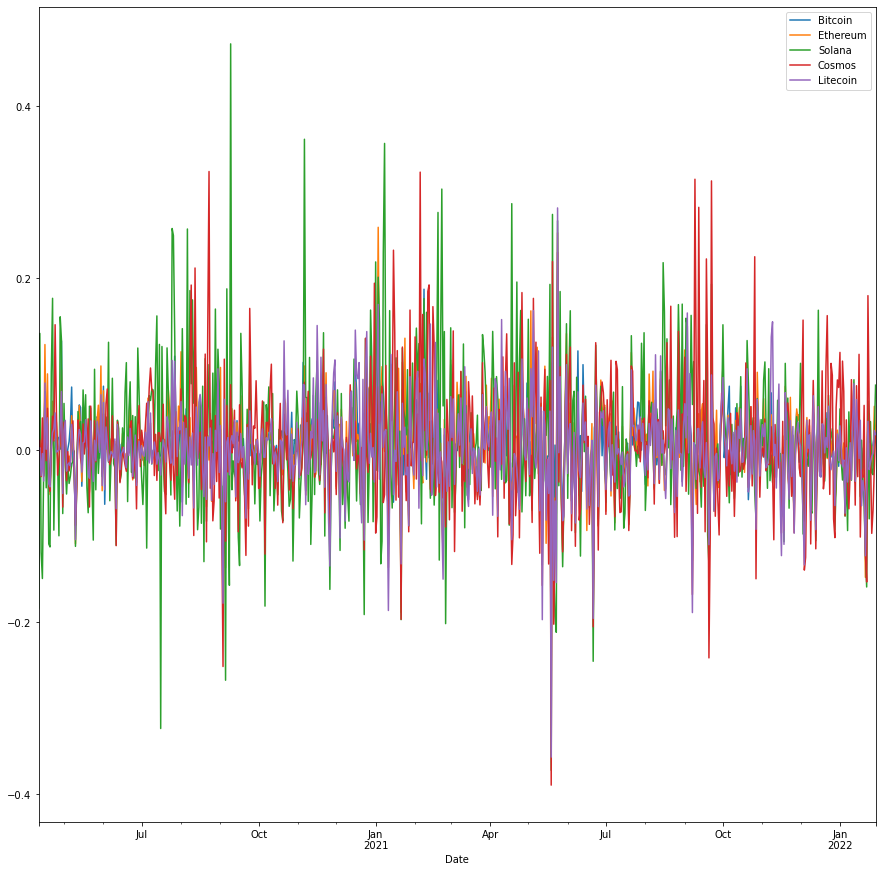

In [25]:
#Plotting percent change to show volatity of price
combined_close_df.plot(figsize=(15,15))

<AxesSubplot:xlabel='Date'>

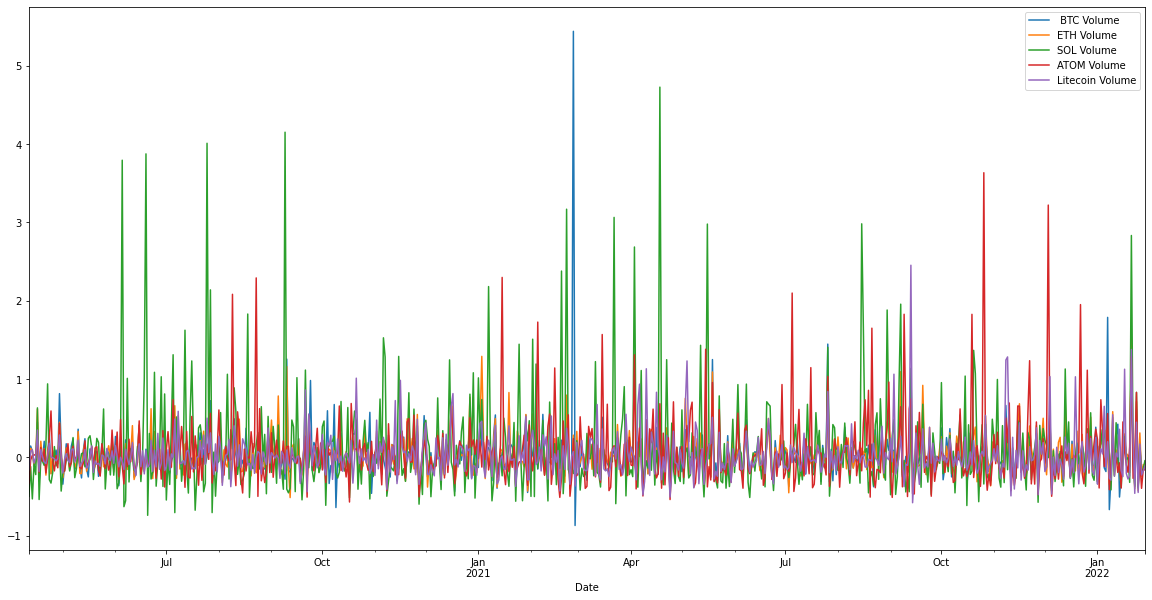

In [26]:
#Plotting percent change to show volatity of volume
combined_volume_df.plot(figsize=(20,10))

## These graphs are nice to have but we can't tell much from them except for how volatile the price and volume are for each of these cryptocurrencies. Is there a better way?

## Of course there is! PANDAS speak volumes! wink wink

In [27]:
#Using HVPlot to make interactive graph for price
combined_close_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [28]:
#Using HVPlot to make interactive graph for volume
combined_volume_df.hvplot.line(figsize=(15,15))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### These graphs for price and volume can show us how each cryptocurrency behaves individually and we can compare their trends with each other. For example, in recent days most of these cryptos have been following similar trends and close to each other except one. Which one is that? Its Cosmos! Cosmos has been volatile since the beginning. Do you notice if if there is a correlation between the price and volume graph? Yes, there is! They are negatively correlated. When price drops volume increase and vice versa. This is a great image for the depiction of the phrase buy the dip and sell the peak! 

## Depiction of stock risk using standard deviation

<AxesSubplot:>

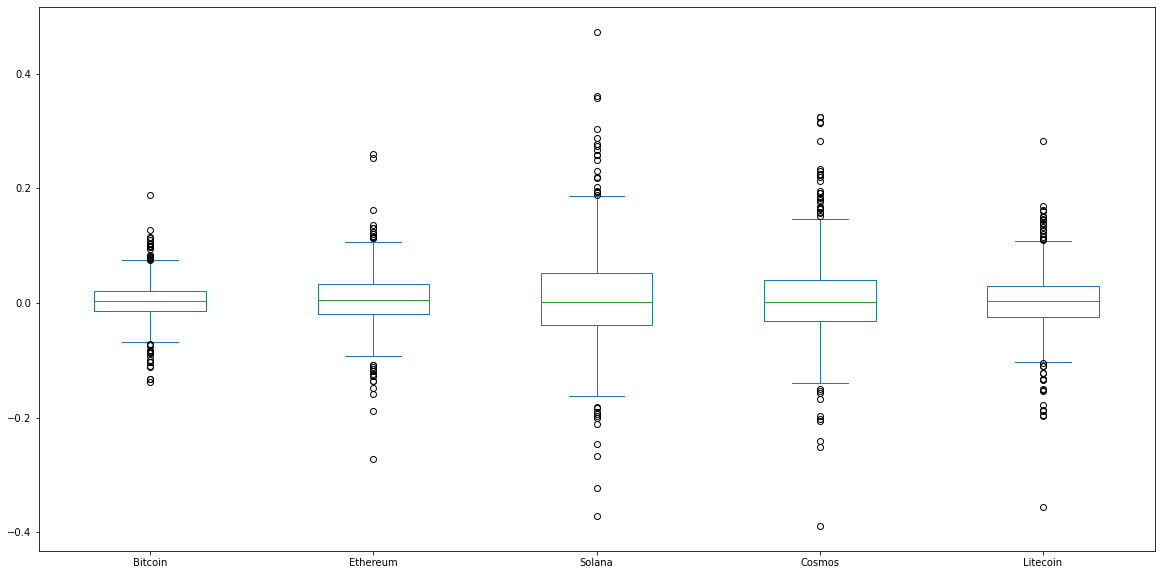

In [30]:
# Box plot to visually show risk
combined_close_df.plot.box(figsize=(20,10))

In [31]:
#Calculating standard deviation to show risk
close_std = combined_close_df.std().sort_values(ascending = False)
close_std

Solana      0.086518
Cosmos      0.074290
Litecoin    0.054071
Ethereum    0.049524
Bitcoin     0.036907
dtype: float64

In [32]:
# Pulling the stats for crypto
combined_close_df.describe()

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
count,658.000000,658.000000,658.000000,658.000000,658.000000
mean,0.003264,0.005451,0.010616,0.006592,0.002937
std,0.036907,0.049524,0.086518,0.074290,0.054071
min,-0.137661,-0.272003,-0.372088,-0.389349,-0.356729
25%,-0.014642,-0.020076,-0.038594,-0.031776,-0.024357
50%,0.002668,0.005597,0.002107,0.001751,0.002556
75%,0.021117,0.032696,0.051993,0.040194,0.028898
max,0.187465,0.259475,0.472828,0.324360,0.282016


### This box plot tells us what we what we want to know in terms of risk. Bitcoin and Ethereum are your safe investments while Solana and Cosmos are your more riskier ones. You can put numbers to the spread shown in the box plot by implementing the .describe function. 

## Showing correlation between the cryptocurrencies by price

In [33]:
#Making a correlation table for price
combined_close_df.corr()

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
Bitcoin,1.000000,0.757089,0.348204,0.484389,0.775415
Ethereum,0.757089,1.000000,0.484819,0.567685,0.790958
Solana,0.348204,0.484819,1.000000,0.382869,0.391224
Cosmos,0.484389,0.567685,0.382869,1.000000,0.534924
Litecoin,0.775415,0.790958,0.391224,0.534924,1.000000


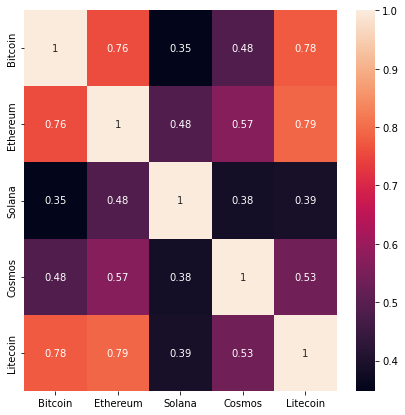

In [34]:
## Making a heatmap to show the above table
plt.figure(figsize=(7, 7))
ax = plt.subplot()
sns.heatmap(combined_close_df.corr(), annot = True, ax = ax);

## Showing correlation between cryptocurrencies for volume

In [35]:
#Making a correlation table for volume
combined_volume_df.corr()

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,Litecoin Volume
BTC Volume,1.000000,0.606907,0.215202,0.264332,0.436581
ETH Volume,0.606907,1.000000,0.341575,0.291898,0.597459
SOL Volume,0.215202,0.341575,1.000000,0.130402,0.233746
ATOM Volume,0.264332,0.291898,0.130402,1.000000,0.248689
Litecoin Volume,0.436581,0.597459,0.233746,0.248689,1.000000


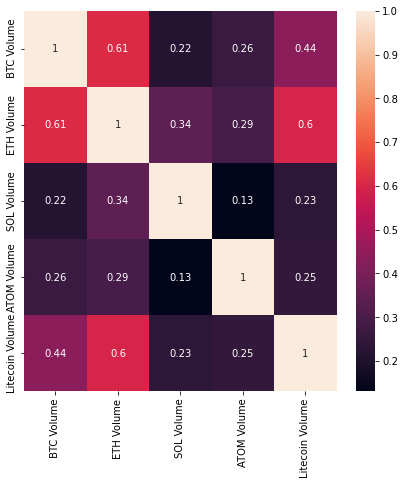

In [36]:
## Making a heatmap to show the above table
plt.figure(figsize=(7, 7))
ax = plt.subplot()
sns.heatmap(combined_volume_df.corr(), annot = True, ax = ax);

### What do these heatmaps and tables tell us in terms of correlation? They show that all cryptocurrencies used are positively correlated, some more than others. 

## S&P500 correlation against our portfolio

In [37]:
combined_close_sp500_df = pd.concat([bitcoin, ethereum, solana, cosmos, litecoin, sp500_df], axis='columns', join='inner').pct_change().dropna()
combined_close_sp500_df

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin,S&P500
Date,,,,,,
2020-04-14,-0.000381,0.008426,-0.149013,0.037750,-0.003653,0.030573
2020-04-15,-0.029276,-0.027345,-0.023075,-0.030297,-0.035679,-0.022030
2020-04-16,0.071467,0.123106,0.068298,0.061794,0.078303,0.005817
2020-04-17,-0.002897,-0.003014,-0.043554,-0.012006,0.001312,0.026794
2020-04-20,-0.030189,0.003837,-0.184518,-0.041464,-0.044839,-0.017881
...,...,...,...,...,...,...
2022-01-18,-0.016800,-0.044102,-0.031280,-0.053069,-0.019583,-0.018388
2022-01-19,-0.014898,-0.021555,-0.040927,-0.031293,-0.035056,-0.009690
2022-01-20,-0.025486,-0.030591,-0.063237,0.052348,-0.047852,-0.011037


## Stock returns are normally distributed with zero mean 
## Notice how ETHEREUM and COSMOS Standard deviation is higher indicating a more volatile stock
## At 2% S&P displays appears to be a stable stock index


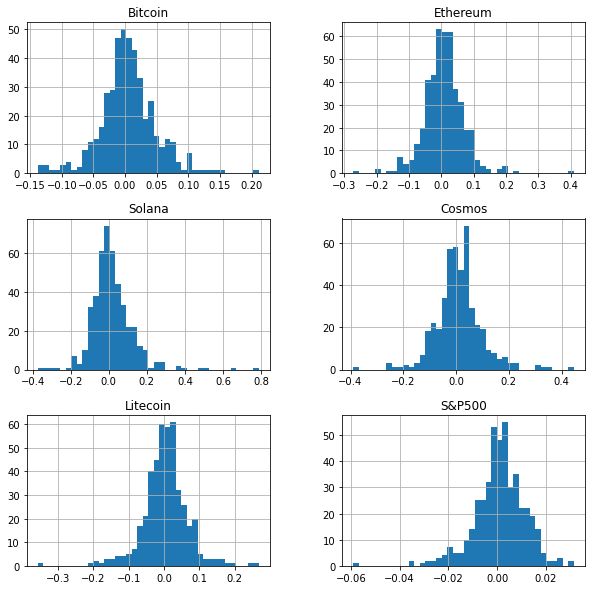

In [38]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Etherium Standard deviation is high indicating a more volatile stock

combined_close_sp500_df.hist(figsize=(10, 10), bins = 40);


<AxesSubplot:xlabel='Date'>

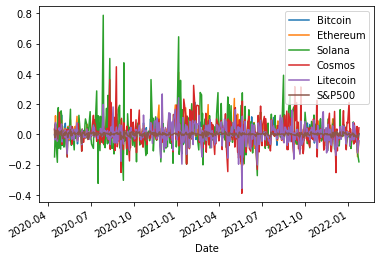

In [39]:
combined_close_sp500_df.plot()

In [40]:
# HVPLOT gives us the ability to dig deeper into the data and even switch on and off our comparisons
# S&P 500 correllation against our portfolio

combined_close_sp500_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [41]:
#Listing Stocks in our portfolio
    
for i in combined_close_sp500_df.columns[1:]:
  print(i)

# Print out the number of stocks
print('\nTotal Number of stocks is: {}'.format(len(combined_close_sp500_df.columns[1:])))

Ethereum
Solana
Cosmos
Litecoin
S&P500

Total Number of stocks is: 5
